# practical-1

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('student-mat.csv')
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


In [2]:
len(df)

395

In [4]:
pivot = df.iloc[0:395][['absences', 'G3']]
pivot

,absences,G3
0,6,6
1,4,6
2,10,10
3,2,15
4,4,10
...,...,...
390,11,9
391,3,16
392,3,7
393,0,10


In [5]:
count = len(pivot[(pivot['absences']>10) & (pivot['G3']>16)])
print(count)

3


In [6]:
count1 = len(pivot[(pivot['absences']>10)])
print(count1)

66


In [7]:
count2 = len(pivot[(pivot['G3']>16)])
print(count2)

24


In [8]:
P_a_intersection_b = count/395
P_a = count2/395
P_b = count1/395
P = P_a_intersection_b/P_b
P

0.04545454545454545

In [9]:
from random import randint
 
NUM_PEOPLE = 23
NUM_POSSIBLE_BIRTHDAYS = 365
NUM_TRIALS = 10000
 

def generate_random_birthday():
    birthday = randint(1, NUM_POSSIBLE_BIRTHDAYS)
    return birthday
 
def generate_k_birthdays(k):
    birthdays = [generate_random_birthday() for _ in range(k)]
    return birthdays
 
def aloc(birthdays):
    unique_birthdays = set(birthdays)
 
    num_birthdays = len(birthdays)
    num_unique_birthdays = len(unique_birthdays)
    has_coincidence = (num_birthdays != num_unique_birthdays)
 
    return has_coincidence
  
def estimate_p_aloc():
    num_aloc = 0
    for _ in range(NUM_TRIALS):
        birthdays = generate_k_birthdays(NUM_PEOPLE)
        has_coincidence = aloc(birthdays)
        if has_coincidence:
            num_aloc += 1
 
    p_aloc = num_aloc / NUM_TRIALS
    return p_aloc
  
p_aloc = estimate_p_aloc()
print(f"Estimated P(ALOC) after {NUM_TRIALS} trials: {p_aloc}")

Estimated P(ALOC) after 10000 trials: 0.5079


In [10]:
from scipy.stats import uniform
uniform.cdf(x=19, loc=15, scale=10) - uniform.cdf(x=17, loc=15, scale=10)

0.2

In [11]:
from scipy import stats
a = stats.norm.cdf(1200,1000,200)
g = 1-a
print(g)

b = stats.norm.cdf(750,1000,200)
print(a-g)
stats.norm.ppf(.15,1000,200)
stats.norm.ppf(.25, 1000,200)

0.15865525393145707
0.6826894921370859


865.1020499607837

In [12]:
from scipy.stats import poisson
poisson.cdf(k=5, mu = 3)


0.9160820579686966

# practical-2

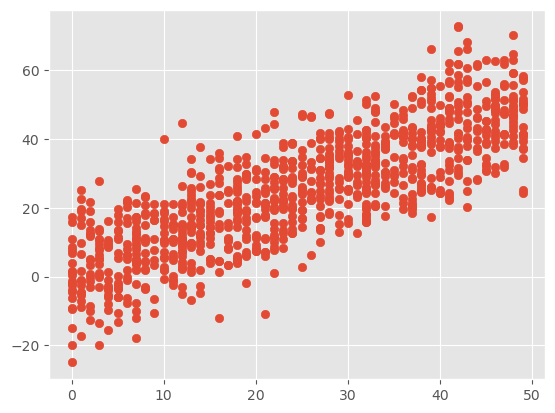

In [21]:
import numpy as np
import random
np.random.seed(1)
x = np.random.randint(0,50,1000)
x
y = x + np.random.normal(0,10,1000)
y
np.corrcoef(x,y)
array=([[1.        , 0.83834934],
       [0.83834934, 1.        ]])
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(x,y)
plt.show()


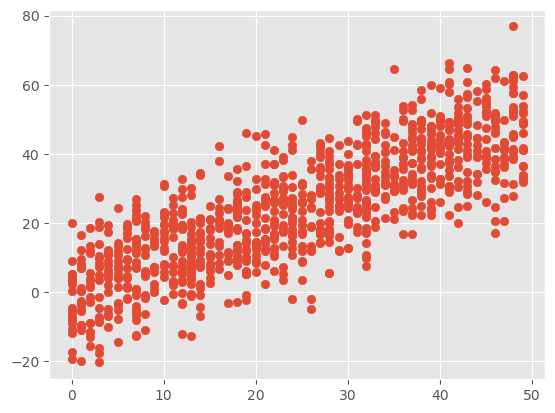

In [23]:
y = x - np.random.normal(0,10,1000)
y
np.corrcoef(x,y) #negative correlation
array=([[1.        , 0.81132791],
       [0.81132791, 1.        ]])
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(x,y)
plt.show()


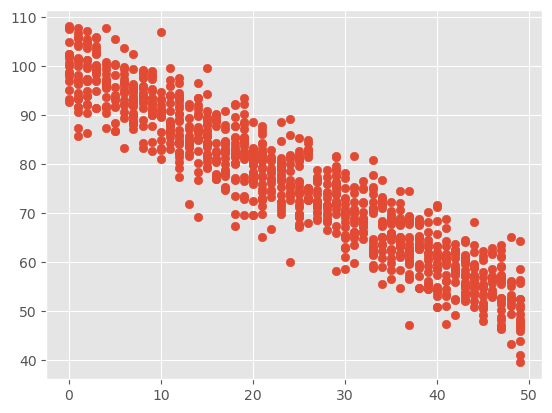

In [24]:
x = np.random.randint(0,50,1000) #1000 values between 0 to 50
y = 100 - x +np.random.normal(0,5,1000)
np.corrcoef(x,y)
array=([[ 1.        , -0.94593662],
       [-0.94593662,  1.        ]])
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(x,y)
plt.show()

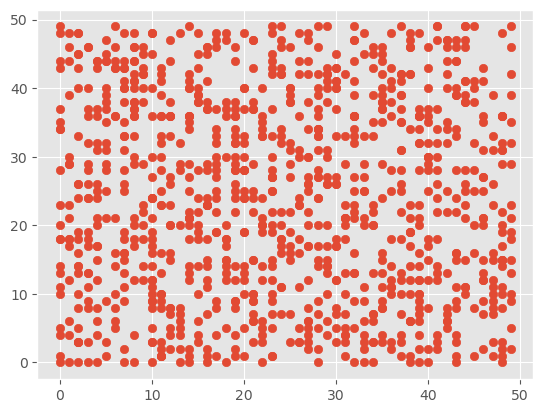

In [25]:
x = np.random.randint(0,50,1000)
y = np.random.randint(0,50,1000)
np.corrcoef(x,y) # 0 correlation
array=([[ 1.        , -0.03136879],
       [-0.03136879,  1.        ]])
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(x,y)
plt.show()


In [35]:
import pandas as pd
df = pd.DataFrame({'a': np.random.randint(0,50,1000)})
df['b'] = df['a'] + np.random.randint(0,10,1000) #+ve
df['c'] = 100- df['a'] + np.random.randint(0,5,1000) #-ve
df['d'] = np.random.randint(0,50,1000) #no corr

df.corr()
a         b         c         d
a  1.000000  0.980877 -0.995363 -0.012647
b  0.980877  1.000000 -0.976675 -0.012932
c -0.995363 -0.976675  1.000000  0.014376
d -0.012647 -0.012932  0.014376  1.000000
pd.plotting.scatter_matrix(df, figsize = (6,6))
plt.show()

SyntaxError: invalid syntax (3738093353.py, line 8)

C:\Users\tanis\AppData\Local\Temp\ipykernel_15464\3977602709.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


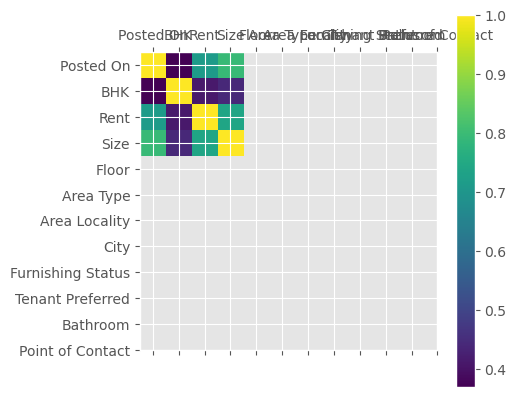

In [26]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()


In [20]:
import pandas as pd
import numpy as np
import seaborn as  sns
import matplotlib.pyplot as plt
from scipy.stats import norm
df = pd.read_csv('House_Rent_Dataset.csv')
df.shape
(4746, 12)
df['Rent'].describe()

count    4.746000e+03
mean     3.499345e+04
std      7.810641e+04
min      1.200000e+03
25%      1.000000e+04
50%      1.600000e+04
75%      3.300000e+04
max      3.500000e+06
Name: Rent, dtype: float64

<Axes: ylabel='Frequency'>

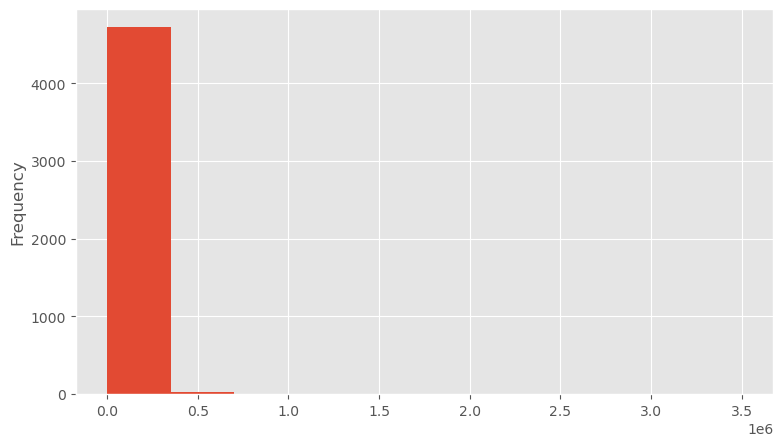

In [27]:
plt.figure(figsize = (9,5))
df['Rent'].plot(kind = "hist")


<Axes: ylabel='Frequency'>

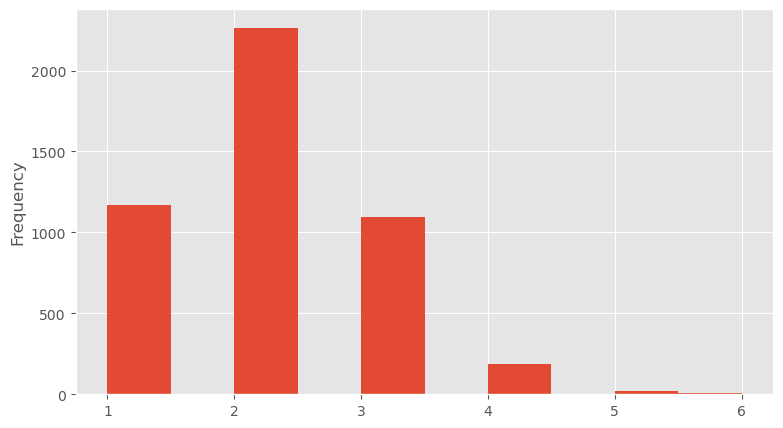

In [28]:
plt.figure(figsize = (9,5))
df['BHK'].plot(kind = "hist")


<Axes: ylabel='Frequency'>

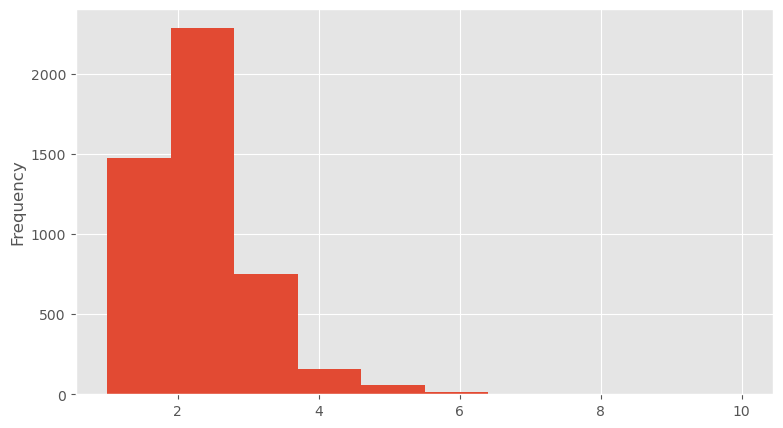

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize = (9,5))
df['Bathroom'].plot(kind = "hist")


C:\Users\tanis\AppData\Local\Temp\ipykernel_15464\2508393431.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


<Axes: >

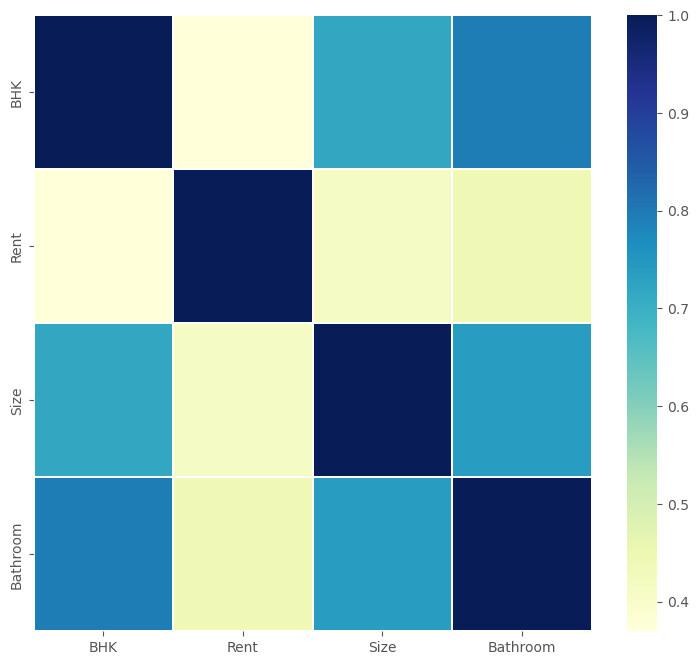

In [30]:
corrmat = df.corr()
f, ax = plt.subplots(figsize = (9,8))

sns.heatmap(corrmat, ax = ax, cmap = "YlGnBu", linewidths= 0.1)


C:\Users\tanis\AppData\Local\Temp\ipykernel_15464\1859134557.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr();


[None, None, None, None, None, None, None, None]

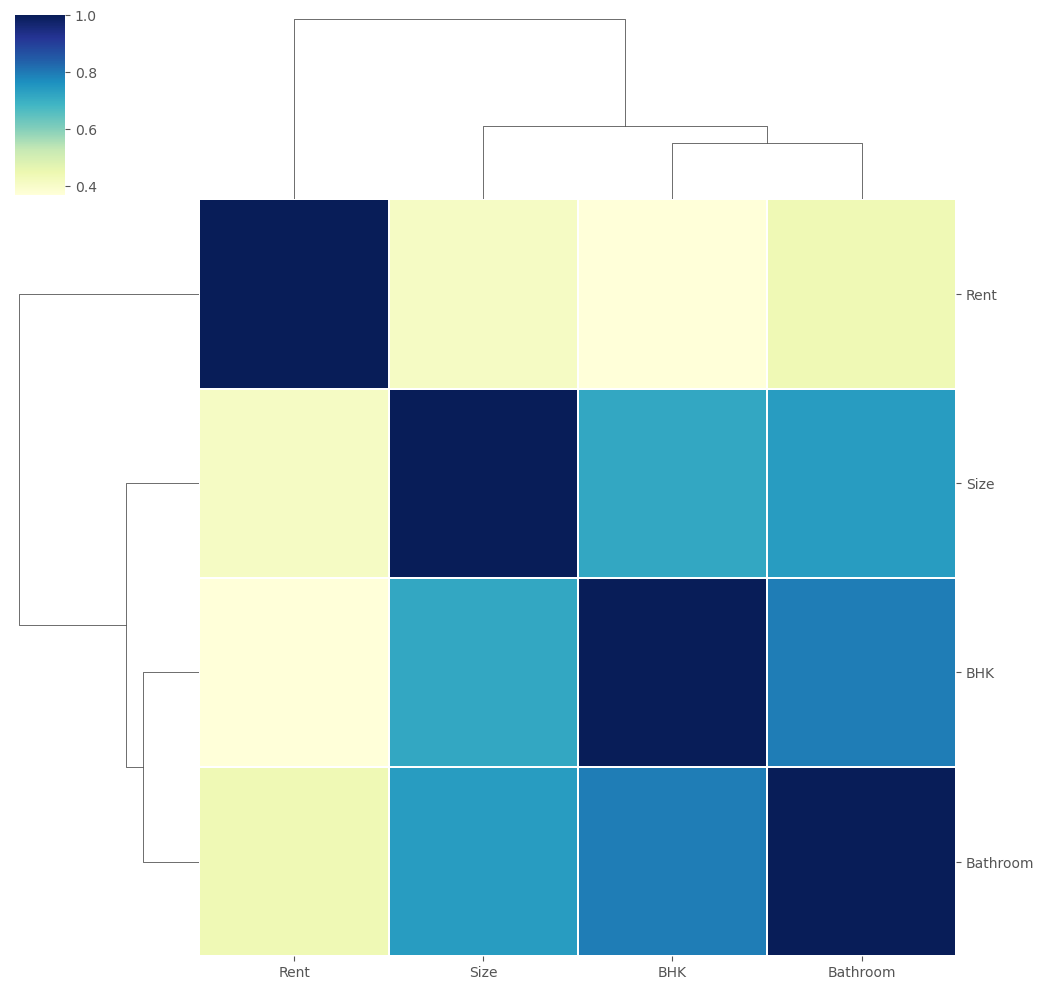

In [31]:
corrmat = df.corr();
cg = sns.clustermap(corrmat, cmap="YlGnBu", linewidths= 0.1)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),rotation =0)


# practical-3

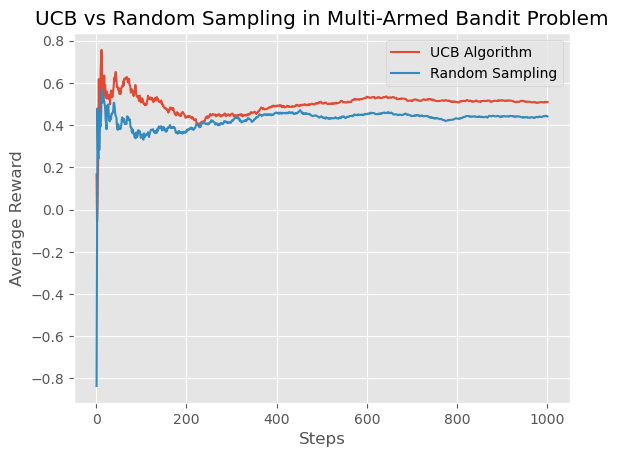

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Upper Confidence Bound (UCB) algorithm
def ucb_bandit(arms, num_steps, c):
    num_arms = len(arms)
    q_values = np.zeros(num_arms)
    n_pulls = np.zeros(num_arms)

    total_reward_ucb = 0
    rewards_ucb = []

    for t in range(1, num_steps + 1):
        # UCB action selection
        ucb_values = q_values + c * np.sqrt(np.log(t) / (n_pulls + 1e-5))
        action = np.argmax(ucb_values)

        # Simulate pulling the selected arm and receiving a reward
        reward = arms[action]()
        total_reward_ucb += reward

        # Update Q-values and counts
        n_pulls[action] += 1
        q_values[action] += (reward - q_values[action]) / n_pulls[action]

        rewards_ucb.append(total_reward_ucb / t)

    return rewards_ucb

# Random sampling algorithm
def random_bandit(arms, num_steps):
    total_reward_random = 0
    rewards_random = []

    for t in range(1, num_steps + 1):
        # Random action selection
        action = np.random.choice(len(arms))

        # Simulate pulling the selected arm and receiving a reward
        reward = arms[action]()
        total_reward_random += reward

        rewards_random.append(total_reward_random / t)

    return rewards_random

# Example usage
def main():
    num_arms = 5
    true_means = np.random.normal(0, 1, num_arms)

    arms = [lambda: np.random.normal(true_means[i], 1) for i in range(num_arms)]
    num_steps = 1000
    c = 2.0

    ucb_rewards = ucb_bandit(arms, num_steps, c)
    random_rewards = random_bandit(arms, num_steps)

    # Plot results
    plt.plot(range(1, num_steps + 1), ucb_rewards, label='UCB Algorithm')
    plt.plot(range(1, num_steps + 1), random_rewards, label='Random Sampling')
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.legend()
    plt.title('UCB vs Random Sampling in Multi-Armed Bandit Problem')
    plt.show()

if __name__ == "__main__":
    main()


# practical-4

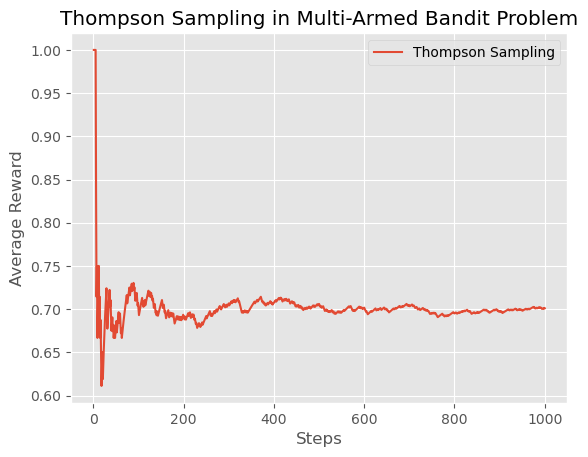

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Thompson Sampling algorithm
def thompson_sampling_bandit(arms, num_steps):
    num_arms = len(arms)
    successes = np.zeros(num_arms)
    failures = np.zeros(num_arms)

    total_reward_ts = 0
    rewards_ts = []

    for t in range(1, num_steps + 1):
        # Thompson Sampling action selection
        sampled_theta = np.random.beta(successes + 1, failures + 1)
        action = np.argmax(sampled_theta)

        # Simulate pulling the selected arm and receiving a reward
        reward = arms[action]()
        total_reward_ts += reward

        # Update successes and failures
        if reward == 1:
            successes[action] += 1
        else:
            failures[action] += 1

        rewards_ts.append(total_reward_ts / t)

    return rewards_ts

# Example usage
def main():
    num_arms = 5
    true_probs = np.random.uniform(0.2, 0.8, num_arms)

    arms = [lambda p=true_probs[i]: np.random.binomial(1, p) for i in range(num_arms)]
    num_steps = 1000

    ts_rewards = thompson_sampling_bandit(arms, num_steps)

    # Plot results
    plt.plot(range(1, num_steps + 1), ts_rewards, label='Thompson Sampling')
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.legend()
    plt.title('Thompson Sampling in Multi-Armed Bandit Problem')
    plt.show()

if __name__ == "__main__":
    main()


# practical-5

In [ ]:
import numpy as np

# Define the environment
class GridWorld:
    def __init__(self, rows, cols):
        self.rows = rows
        self.cols = cols
        self.state_space = rows * cols
        self.action_space = 4  # 0: up, 1: down, 2: left, 3: right
        self.grid = np.zeros((rows, cols))

        # Define rewards and obstacles
        self.rewards = {(rows - 1, cols - 1): 1}  # Goal state
        self.obstacles = [(1, 1)]  # Obstacle at (1, 1)

        # Initialize Q-values
        self.Q = np.zeros((self.state_space, self.action_space))

    def get_state(self, row, col):
        return row * self.cols + col

    def is_valid_state(self, row, col):
        return 0 <= row < self.rows and 0 <= col < self.cols and (row, col) not in self.obstacles

    def take_action(self, state, action):
        current_row, current_col = divmod(state, self.cols)

        if action == 0:  # Move up
            next_row = current_row - 1
            next_col = current_col
        elif action == 1:  # Move down
            next_row = current_row + 1
            next_col = current_col
        elif action == 2:  # Move left
            next_row = current_row
            next_col = current_col - 1
        elif action == 3:  # Move right
            next_row = current_row
            next_col = current_col + 1

        if self.is_valid_state(next_row, next_col):
            return self.get_state(next_row, next_col)
        else:
            return state

# Q-learning algorithm
def q_learning(env, num_episodes, learning_rate, discount_factor, exploration_prob):
    for episode in range(num_episodes):
        state = env.get_state(0, 0)

        while state not in env.rewards:
            # Epsilon-greedy exploration-exploitation strategy
            if np.random.rand() < exploration_prob:
                action = np.random.choice(env.action_space)
            else:
                action = np.argmax(env.Q[state])

            next_state = env.take_action(state, action)
            reward = env.rewards.get(next_state, 0)

            # Q-value update
            best_next_action_value = np.max(env.Q[next_state])
            env.Q[state, action] += learning_rate * (reward + discount_factor * best_next_action_value - env.Q[state, action])

            state = next_state

# Function to visualize the learned policy
def visualize_policy(env):
    policy = np.argmax(env.Q, axis=1).reshape((env.rows, env.cols))
    print("Learned Policy:")
    print(policy)

# Example usage
def main():
    rows, cols = 3, 3
    env = GridWorld(rows, cols)

    num_episodes = 1000
    learning_rate = 0.1
    discount_factor = 0.9
    exploration_prob = 0.2

    q_learning(env, num_episodes, learning_rate, discount_factor, exploration_prob)
    visualize_policy(env)

if __name__ == "__main__":
    main()


# practical-6

In [1]:
import numpy as np

class MarkovProcess:
    def __init__(self, transition_matrix, initial_state):
        """
        Initialize the Markov process.

        Parameters:
            - transition_matrix: a 2D numpy array representing the transition probabilities.
            - initial_state: the initial state of the process.
        """
        self.transition_matrix = transition_matrix
        self.current_state = initial_state

    def step(self):
        """
        Perform one step of the Markov process by transitioning to a new state based on the
        probabilities in the transition matrix.

        Returns:
            - new_state: the new state after the transition.
        """
        transition_probs = self.transition_matrix[self.current_state]
        new_state = np.random.choice(len(transition_probs), p=transition_probs)
        self.current_state = new_state
        return new_state

# Example usage
def main():
    # Define a transition matrix for a simple 3-state Markov chain
    # Rows represent current state, columns represent next state
    transition_matrix = np.array([
        [0.7, 0.2, 0.1],
        [0.3, 0.4, 0.3],
        [0.1, 0.3, 0.6]
    ])

    # Initial state
    initial_state = 0

    # Create a Markov process
    markov_process = MarkovProcess(transition_matrix, initial_state)

    # Perform 10 steps of the Markov process
    for _ in range(10):
        new_state = markov_process.step()
        print(f"Current State: {markov_process.current_state}, Next State: {new_state}")

if __name__ == "__main__":
    main()


Current State: 1, Next State: 1
Current State: 1, Next State: 1
Current State: 1, Next State: 1
Current State: 0, Next State: 0
Current State: 1, Next State: 1
Current State: 1, Next State: 1
Current State: 2, Next State: 2
Current State: 1, Next State: 1
Current State: 1, Next State: 1
Current State: 2, Next State: 2


# practical-7

In [4]:
import numpy as np

def policy_iteration(transitions, rewards, gamma=0.9, epsilon=1e-6):
    """
    Perform policy iteration to find the optimal policy for a given MDP.

    Parameters:
        - transitions: a 3D numpy array representing state transitions. 
                       transitions[s, a, s'] is the probability of transitioning from state s to s' under action a.
        - rewards: a 2D numpy array representing immediate rewards. rewards[s, a] is the immediate reward for taking action a in state s.
        - gamma: discount factor for future rewards.
        - epsilon: convergence threshold.

    Returns:
        - optimal_policy: a 1D numpy array representing the optimal policy.
    """
    num_states, num_actions, _ = transitions.shape

    # Initialize a random policy
    policy = np.random.randint(0, num_actions, num_states)

    while True:
        # Policy evaluation
        value_function = np.zeros(num_states)
        while True:
            delta = 0
            for s in range(num_states):
                v = value_function[s]
                action = policy[s]
                value_function[s] = np.sum(transitions[s, action] * (rewards[s, action] + gamma * value_function))
                delta = max(delta, abs(v - value_function[s]))

            if delta < epsilon:
                break

        # Policy improvement
        policy_stable = True
        for s in range(num_states):
            old_action = policy[s]

            # Compute Q-values for all actions
            q_values = np.sum(transitions[s] * (rewards[s] + gamma * value_function), axis=1)

            # Choose the action with the highest Q-value
            new_action = np.argmax(q_values)

            # Update the policy
            policy[s] = new_action

            # Check if the policy has changed
            if old_action != new_action:
                policy_stable = False

        if policy_stable:
            break
    return policy
# Example usage
def main():
    # Define a simple MDP with 3 states and 2 actions
    num_states = 3
    num_actions = 2

    # Define state transitions
    transitions = np.array([
        [[0.7, 0.3], [0.4, 0.6], [0.2, 0.8]],
        [[0.1, 0.9], [0.6, 0.4], [0.3, 0.7]],
        [[0.2, 0.8], [0.8, 0.2], [0.5, 0.5]]
    ])

    # Define immediate rewards
    rewards = np.array([
        [-1, 10],
        [2, 0],
        [0, -1]
    ])

    optimal_policy = policy_iteration(transitions, rewards)
    print("Optimal Policy:", optimal_policy)

if __name__ == "__main__":
main()


IndentationError: expected an indented block after 'if' statement on line 80 (1383715972.py, line 81)

In [ ]:
import numpy as np

# Define constants for the Blackjack problem
NUM_ACTIONS = 2  # 0: Stick, 1: Hit
NUM_CARDS = 10
PLAYER_THRESHOLD = 12
DEALER_THRESHOLD = 17
NUM_EPISODES = 500000

def initialize_deck():
    """
    Initialize the deck for the Blackjack problem.
    Returns a list of cards with values from 1 to 10.
    """
    return np.random.randint(1, 11, NUM_CARDS)

def draw_card(deck):
    """
    Draw a card from the deck.
    """
    return np.random.choice(deck)

def play_blackjack():
    """
    Play a single episode of the Blackjack problem using Monte Carlo method.
    Returns the episode as a list of (state, action, reward) tuples.
    """
    player_sum = 0
    dealer_showing = 0
    usable_ace = False
    deck = initialize_deck()

    # Initial deal
    player_sum += draw_card(deck)
    dealer_showing = draw_card(deck)
    player_sum += draw_card(deck)

    episode = []

    # Player's turn
    while player_sum < PLAYER_THRESHOLD:
        action = 1  # Hit
        episode.append((player_sum, dealer_showing, usable_ace, action, 0))  # State, Action, Reward
        player_sum += draw_card(deck)

        if player_sum > 21 and usable_ace:
            player_sum -= 10
            usable_ace = False
        elif player_sum > 21 and 11 in episode[0]:
            episode[0] = (player_sum - 10, dealer_showing, usable_ace, action, 0)  # Update initial state

    # Dealer's turn
    dealer_sum = dealer_showing
    while dealer_sum < DEALER_THRESHOLD:
        dealer_sum += draw_card(deck)

    # Determine the winner
    if player_sum > 21:
        reward = -1
    elif dealer_sum > 21 or player_sum > dealer_sum:
        reward = 1
    elif player_sum < dealer_sum:
        reward = -1
    else:
        reward = 0

    # Update rewards in the episode
    for i in range(len(episode)):
        episode[i] = (episode[i][0], episode[i][1], episode[i][2], episode[i][3], reward)

    return episode

def monte_carlo_evaluation(num_episodes):
    """
    Perform Monte Carlo evaluation to estimate state values for the Blackjack problem.
    Returns a dictionary mapping state to the estimated value.
    """
    state_values = {}
    state_counts = {}

    for _ in range(num_episodes):
        episode = play_blackjack()

        for i, (state, _, _, _, reward) in enumerate(episode):
            if state not in state_values:
                state_values[state] = 0
                state_counts[state] = 0

            # Incremental update of state values
            state_values[state] += (reward - state_values[state]) / (state_counts[state] + 1)
            state_counts[state] += 1

    return state_values

# Example usage
def main():
    num_episodes = NUM_EPISODES
    state_values = monte_carlo_evaluation(num_episodes)

    print("State Values:")
    for state, value in sorted(state_values.items()):
        print(f"State: {state}, Value: {value:.4f}")

if __name__ == "__main__":
    main()


In [2]:
import gym
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from functools import partial
%matplotlib inline
plt.style.use('ggplot')
env = gym.make('Blackjack-v1')

def sample_policy(observation):
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1
def generate_episode(policy, env):
    
    # we initialize the list for storing states, actions, and rewards
    states, actions, rewards = [], [], []
    
    # Initialize the gym environment
    observation = env.reset()
    
    while True:
        
        # append the states to the states list
        states.append(observation)
        
        # now, we select an action using our sample_policy function and append the action to actions list
         
        action = sample_policy(observation)
        actions.append(action)
        
        # We perform the action in the environment according to our sample_policy, move to the next state 
        # and receive reward
        observation, reward, done, info = env.step(action)
        rewards.append(reward)
        
        # Break if the state is a terminal state
        if done:
             break
                
    return states, actions, rewards
def first_visit_mc_prediction(policy, env, n_episodes):
    
    # First, we initialize the empty value table as a dictionary for storing the values of each state
    value_table = defaultdict(float)
    N = defaultdict(int)

    
    for _ in range(n_episodes):
        
        # Next, we generate the epsiode and store the states and rewards
        states, _, rewards = generate_episode(policy, env)
        returns = 0
        
        # Then for each step, we store the rewards to a variable R and states to S, and we calculate
        # returns as a sum of rewards
        
        for t in range(len(states) - 1, -1, -1):
            R = rewards[t]
            S = states[t]
            
            returns += R
            
            # Now to perform first visit MC, we check if the episode is visited for the first time, if yes,
            # we simply take the average of returns and assign the value of the state as an average of returns
            
            if S not in states[:t]:
                N[S] += 1
                value_table[S] += (returns - value_table[S]) / N[S]
    
    return value_table
value = first_visit_mc_prediction(sample_policy, env, n_episodes=500000)
for i in range(10):
    print(value.popitem())
((4, 3, False), -0.4716981132075471)
((4, 2, False), -0.3723849372384937)
((5, 6, False), -0.5337552742616039)
((4, 4, False), -0.4520547945205479)
((12, 9, True), -0.27800829875518657)
((15, 7, True), -0.3320825515947466)
((13, 7, True), -0.18825910931174086)
((12, 7, True), -0.1826086956521738)
((12, 5, True), -0.15246636771300448)
((19, 7, True), -0.43837209302325647)
def plot_blackjack(V, ax1, ax2):
    player_sum = np.arange(12, 21 + 1)
    dealer_show = np.arange(1, 10 + 1)
    usable_ace = np.array([False, True])
    state_values = np.zeros((len(player_sum), len(dealer_show), len(usable_ace)))

    for i, player in enumerate(player_sum):
        for j, dealer in enumerate(dealer_show):
            for k, ace in enumerate(usable_ace):
                state_values[i, j, k] = V[player, dealer, ace]
    
    X, Y = np.meshgrid(player_sum, dealer_show)
 
    ax1.plot_wireframe(X, Y, state_values[:, :, 0])
    ax2.plot_wireframe(X, Y, state_values[:, :, 1])
 
    for ax in ax1, ax2:
        ax.set_zlim(-1, 1)
        ax.set_ylabel('player sum')
        ax.set_xlabel('dealer showing')
        ax.set_zlabel('state-value')
fig, axes = pyplot.subplots(nrows=2, figsize=(5, 8),
subplot_kw={'projection': '3d'})
axes[0].set_title('value function without usable ace')
axes[1].set_title('value function with usable ace')
plot_blackjack(value, axes[0], axes[1])


ValueError: not enough values to unpack (expected 3, got 2)